# Exercises

## Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

#### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

#### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

#### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

#### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

#### 5. Run through steps 2-4 using a different max_depth value.

#### 6. Which model performs better on your in-sample data?

#### 7. Which model performs best on your out-of-sample data, the validate set?


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

### Acquire

In [106]:
# Acquire

df = acquire.get_titanic_data()

In [107]:
df.head(1)

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.25,S,Third,NaN,Southampton,0


In [108]:
df = prepare.prep_titanic(df)
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.25,Southampton,0,1,0,1


In [30]:
train, validate, test = prepare.split_dataset(df)

In [31]:
train.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
689,1,1,female,15.0,0,1,211.3375,Southampton,0,0,0,1


In [35]:
train.isna().sum()

survived                     0
pclass                       0
sex                          0
age                        100
sibsp                        0
parch                        0
fare                         0
embark_town                  2
alone                        0
sex_male                     0
embark_town_Queenstown       0
embark_town_Southampton      0
dtype: int64

In [178]:
# Divide the Splits from Target
# Drop Columns With Nulls

X_train = train.drop(columns=['survived', 'sex', 'embark_town','age'])
y_train = train['survived']

X_validate = validate.drop(columns=['survived', 'sex', 'embark_town','age'])
y_validate = validate['survived']

X_test = test.drop(columns=['survived', 'sex', 'embark_town','age'])
y_test = test['survived']

In [180]:
X_train.isna().sum()

pclass                     0
sibsp                      0
parch                      0
fare                       0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [181]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
689,1,0,1,211.3375,0,0,0,1
84,2,0,0,10.5000,1,0,0,1
738,3,0,0,7.8958,1,1,0,1
441,3,0,0,9.5000,1,1,0,1
643,3,0,0,56.4958,1,1,0,1


In [182]:
# .head() for series

y_train[:5]

689    1
84     1
738    0
441    0
643    1
Name: survived, dtype: int64

In [66]:
X_train.shape, X_validate.shape, X_test.shape

((498, 9), (214, 9), (179, 9))

In [67]:
y_train.shape, y_validate.shape, y_test.shape

((498,), (214,), (179,))

In [183]:
y_train.head(3)

689    1
84     1
738    0
Name: survived, dtype: int64

In [185]:
X_train.isna().sum()

pclass                     0
sibsp                      0
parch                      0
fare                       0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [81]:
y_train[0:5]

689    1
84     1
738    0
441    0
643    1
Name: survived, dtype: int64

In [84]:
y_train[-5:]

653    1
20     0
589    0
514    0
281    0
Name: survived, dtype: int64

In [85]:
# Base Class = Deaths

y_train.value_counts()

0    302
1    196
Name: survived, dtype: int64

In [86]:
y_train.max()

1

In [87]:
y_train.mode()

0    0
Name: survived, dtype: int64

In [88]:
baseline = y_train.mode()
baseline

0    0
Name: survived, dtype: int64

In [89]:
# baseline vs actual
baseline_vs_actual = (y_train == 0)

In [92]:
baseline_vs_actual[:5]

689    False
84     False
738     True
441     True
643    False
Name: survived, dtype: bool

In [96]:
baseline_vs_actual.size

498

In [94]:
baseline_vs_actual.sum()

302

In [97]:
302/498

0.606425702811245

In [90]:
baseline_accuracy = baseline_vs_actual.mean()

In [93]:
print(f"Baseline Accuracy: {round(baseline_accuracy, 2)}")

Baseline Accuracy: 0.61


### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [112]:
X_train.isna().sum()

pclass                       0
age                        100
sibsp                        0
parch                        0
fare                         0
alone                        0
sex_male                     0
embark_town_Queenstown       0
embark_town_Southampton      0
dtype: int64

In [117]:
X_train.drop(columns='age',inplace=True)

In [118]:
X_train.isna().sum()

pclass                     0
sibsp                      0
parch                      0
fare                       0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [ ]:
# drop columns

In [116]:
#imputer = SimpleImputer(strategy = 'mean')

In [ ]:
# impute
# use mean to assign most common to NAN
# simpleimputer

In [ ]:
# Make The Thing

In [119]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=42)

In [120]:
tree1

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Fit The Thing

In [121]:
tree1 = tree1.fit(X_train, y_train)

In [122]:
y_pred = tree1.predict(X_train)

In [186]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [126]:
y_pred[:5]

array([1, 1, 0, 0, 0])

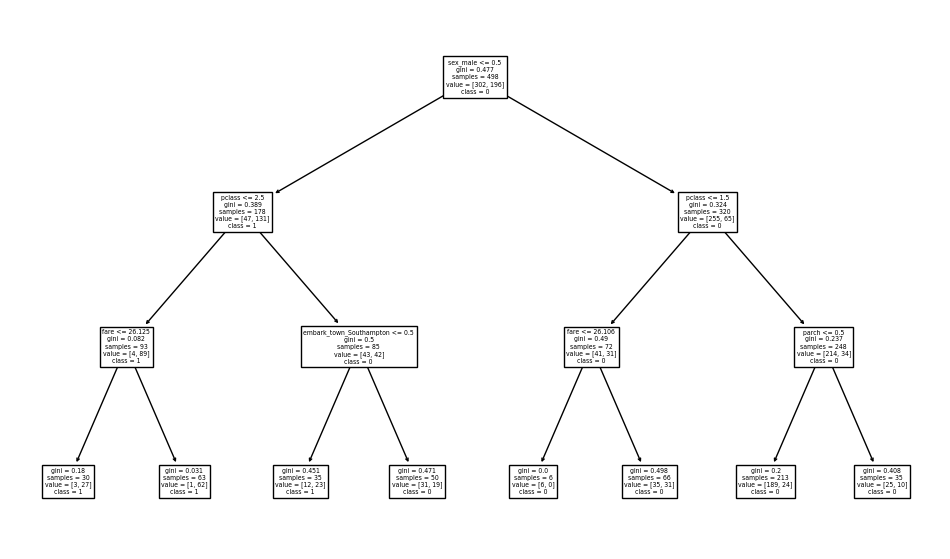

In [188]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [ ]:
accuracy = tree1.score(X_train, y_train)

In [128]:
tree1.score(X_train, y_train)

0.7991967871485943

In [187]:
confusion_matrix(y_train, y_pred)

array([[286,  16],
       [ 84, 112]])

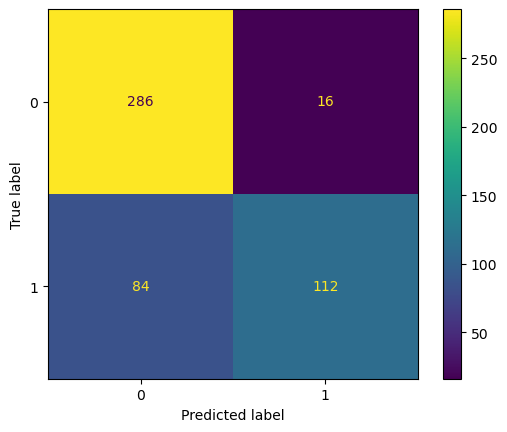

In [129]:
plot_confusion_matrix(tree1, X_train, y_train)

In [131]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       302
           1       0.88      0.57      0.69       196

    accuracy                           0.80       498
   macro avg       0.82      0.76      0.77       498
weighted avg       0.81      0.80      0.79       498



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

<img align="left" width="400" src="f1_score.png">

In [ ]:
f1_formula = 2*((precision*recall)/(precision+recall))

In [ ]:
f1_formula = TP/(TP+(.5*(FP+FN)))

In [141]:
help(np.ravel)

Help on function ravel in module numpy:

ravel(a, order='C')
    Return a contiguous flattened array.
    
    A 1-D array, containing the elements of the input, is returned.  A copy is
    made only if needed.
    
    As of NumPy 1.10, the returned array will have the same type as the input
    array. (for example, a masked array will be returned for a masked array
    input)
    
    Parameters
    ----------
    a : array_like
        Input array.  The elements in `a` are read in the order specified by
        `order`, and packed as a 1-D array.
    order : {'C','F', 'A', 'K'}, optional
    
        The elements of `a` are read using this index order. 'C' means
        to index the elements in row-major, C-style order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest.  'F' means to index the elements
        in column-major, Fortran-style order, with the
        first index changing fastest, and the last index changing
       

In [205]:
# Layman's Terms
#
# tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

In [142]:
confusion_matrix(y_train, y_pred)

array([[286,  16],
       [ 84, 112]])

In [144]:
confusion_matrix(y_train, y_pred).ravel()

array([286,  16,  84, 112])

In [145]:
print(y_train.value_counts())

0    302
1    196
Name: survived, dtype: int64


In [136]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

In [137]:
TN, FP, FN, TP

(286, 16, 84, 112)

In [146]:
ALL = TP + FP + FN + TN

In [147]:
actual_negative = TN + FP
actual_positives = FN + TP

In [148]:
accuracy = (TP + TN)/ALL

In [149]:
print(actual_negative)
print(actual_positives)

302
196


<img align="left" width="400" src="f1_score.png">

### Precision
# $\frac{\text{TP}}{\text{TP + FP}} $

 ### Recall
 # $\frac{TP}{TP + FN}$

In [161]:
TP/(TP+FP+FN+TN)

0.2248995983935743

In [151]:
precision = TP/(TP+FP)

In [152]:
recall = TP/(TP+FN)

In [156]:
f1_formula1 = 2*((precision*recall)/(precision+recall))

In [157]:
f1_formula2 = TP/(TP+(.5*(FP+FN)))

In [158]:
f1_formula

0.691358024691358

In [159]:
f1_formula2

0.691358024691358

### 5. Run through steps 2-4 using a different max_depth value.

In [168]:
X_train.isna().sum()

pclass                     0
sibsp                      0
parch                      0
fare                       0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [199]:
report = classification_report(y_train, y_predictions, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.929032,0.925532,0.927711,0.927282,0.927655
recall,0.953642,0.887755,0.927711,0.920699,0.927711
f1-score,0.941176,0.906250,0.927711,0.923713,0.927430
support,302.000000,196.000000,0.927711,498.000000,498.000000


In [197]:
for i in range(1, 21):
    # Do The Thing
    tree = DecisionTreeClassifier(max_depth=i, random_state=42)

    # Fit The Thing
    tree = tree.fit(X_train, y_train)

    # Predictions
    y_predictions = tree.predict(X_train)

    # Compare Actual Y values vs. Predicted Y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.796875    0.735955    0.7751    0.766415      0.772898
recall       0.844371    0.668367    0.7751    0.756369      0.775100
f1-score     0.819936    0.700535    0.7751    0.760235      0.772943
support    302.000000  196.000000    0.7751  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.735802    0.956989  0.777108    0.846396      0.822856
recall       0.986755    0.454082  0.777108    0.720418      0.777108
f1-score     0.842999    0.615917  0.777108    0.729458      0.753625
support    302.000000  196.000000  0.777108  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.772973    0.875000  0.799197    0.823986      0.813128
recall       0.947020    0.571429  0.799197    0.759224      0.799197
f1-score     

### 6. Which model performs better on your in-sample data?

In [ ]:
y_preds['model2'] = clf2.predict(X_train)

In [ ]:
clf2.score(X_train, y_train)

In [24]:
# 15 = max accuracy

### 7. Which model performs best on your out-of-sample data, the validate set?

In [203]:
performance = []
for i in range(1, 25):
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)
    tree = tree.fit(X_train, y_train)

    test_accuracy = tree.score(X_train, y_train)
    # evaluate model - ytrain vs ypred
    val_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": test_accuracy,
        "validate_accuracy": val_accuracy}
    
    performance.append(output)
    
df = pd.DataFrame(performance)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.775100,0.803738,-0.028638
1,2,0.777108,0.785047,-0.007938
2,3,0.799197,0.813084,-0.013887
3,4,0.825301,0.794393,0.030909
4,5,0.847390,0.775701,0.071689
5,6,0.867470,0.808411,0.059059
6,7,0.887550,0.794393,0.093158
7,8,0.901606,0.780374,0.121233
8,9,0.913655,0.794393,0.119262
9,10,0.915663,0.761682,0.153980


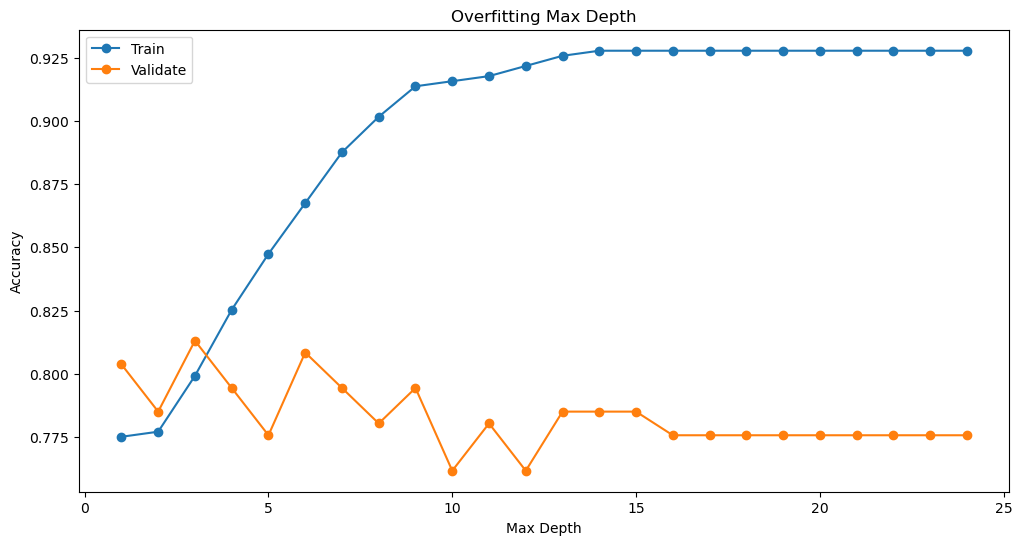

In [204]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [174]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
2,3,0.799197,0.813084,-0.013887
5,6,0.867470,0.808411,0.059059
0,1,0.775100,0.803738,-0.028638
3,4,0.825301,0.794393,0.030909
6,7,0.887550,0.794393,0.093158
1,2,0.777108,0.785047,-0.007938
4,5,0.847390,0.775701,0.071689


In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_train, y_train)

In [ ]:
clf.predict(X_train)

In [ ]:
X_val, y_val = validate.drop(columns='survived'), validate.survived

In [ ]:
clf.score(X_val, y_val)

In [ ]:
# Model 2
clf2.score(X_train, y_train)

In [ ]:
clf2.score(X_val, y_val)

In [ ]:
# LOOP VERSION

models = []
model_scores = []
for i in range(2,8):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    models.append(model)
    model_scores.append(model.score(X_train, y_train))

In [ ]:
len(models)